# Lập trình thống kê Python cơ bản

# Bài 2: Trung vị

### BS. Lê Ngọc Khả Nhi

Xin chào các bạn, đây là bài số 2 trong Series Lập trình thống kê cơ bản với ngôn ngữ Python. Trong bài hôm nay, chúng ta sẽ viết Python code để ước tính thủ công giá trị trung vị (median) của một array dữ liệu.

Trung vị là một trong những trị số thống kê dùng để mô tả khuynh hướng trung tâm của phân phối.

Theo định nghĩa, trung vị là giá trị chia một phân bố xác suất (mẫu, quần thể) thành 2 phần bằng nhau (số lượng các con số nằm trên hay dưới trung vị là bằng nhau, có nghĩa rằng một nửa mẫu sẽ có các giá trị nhỏ hơn hay bằng trung vị, và một nửa còn lại sẽ có giá trị bằng hoặc lớn hơn trung vị).

In [1]:
import statistics as stats
import numpy as np
import scipy as sp
import pandas as pd

import seaborn as sns

Trước hết ta sinh 2 chuỗi giá trị ngẫu nhiên có cùng phân bố Gamma (lệch phải, dương) với 2 trường hợp cỡ mẫu chẵn và lẽ:

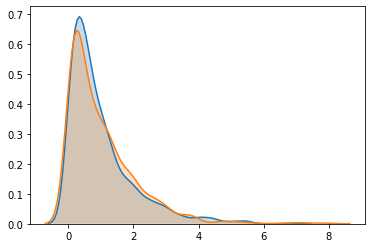

In [2]:
np.random.seed(123)
x_odd = np.random.gamma(1,1, 999)
x_even = np.random.gamma(1,1, 1000)

sns.kdeplot(x_odd, shade = True)
sns.kdeplot(x_even, shade =True)

Để tìm số trung vị của một danh sách hữu hạn nhiều con số, trước hết ta xếp theo thứ tự tăng dần tất cả các giá trị quan sát, sau đó xét xem số lượng quan sát là chẵn hay lẻ, nếu là lẻ thì ta lấy giá trị nằm giữa, nếu là chẵn, ta lấy trung bình của hai giá trị nằm giữa.

Có nhiều cách viết code khác nhau để thi hành việc này: 

Ghi chú: Dữ liệu đầu vào là 1 numpy array, do đó ta có thể dùng method sort() để sắp xếp thứ tự hay dùng hàm sorted() của Python.

## Cách 1

In [3]:
def my_median(x):
    n = len(x)
    if n % 2:
        med = sorted(x)[round((n-1)*0.5)]
    else:
        x_ord, idx =sorted(x), round(n * 0.5)
        
        med = 0.5 * (x_ord[idx - 1] + x_ord[idx])
        
    return(med)

In [4]:
my_median(x_odd)

0.6756815583548628

In [5]:
my_median(x_even)

0.7064836080718486

## Cách 2

In [6]:
def my_median2(x):
    quotient, remainder = divmod(len(x), 2)
    if remainder:
        return sorted(x)[quotient]
    return 0.5*(sum(sorted(x)[quotient - 1:quotient + 1]))

In [ ]:
# Tương đương:

def my_median2(x):
    x.sort()
    quotient, remainder = divmod(len(x), 2)
    if remainder:
        return x[quotient]
    return 0.5*(sum(x[quotient - 1:quotient + 1]))

In [7]:
my_median2(x_odd)

0.6756815583548628

In [9]:
my_median2(x_even)

0.7064836080718486

## Cách 3

In [10]:
def my_median3(x):
    mid = len(x) // 2
    x.sort()
    if ~len(x) % 2:
        return 0.5 * (x[mid - 1] + x[mid])
    return x[mid]

In [11]:
my_median3(x_odd)

0.6756815583548628

In [12]:
my_median3(x_even)

0.7064836080718486

## Cách 4

(Đây có lẽ là cách ngắn gọn nhất, nhưng hơi khó đọc)

In [13]:
def short_median(x):
    x.sort()
    mid = len(x) // 2
    return 0.5*(x[mid] + x[~mid])

In [14]:
short_median(x_odd)

0.6756815583548628

In [15]:
short_median(x_even)

0.7064836080718486

Ngoài ra, bạn có thể tính median bằng package numpy, pandas, scipy hoặc statistics:

## Numpy

In [19]:
np.median(x_odd)

0.6756815583548628

In [18]:
np.median(x_even)

0.7064836080718486

Chú ý: method median không chấp nhận missing value, method nanmedian thì được

In [26]:
np.median(np.append(x_even,np.nan))

nan

In [29]:
np.nanmedian(np.append(x_even,np.nan))

0.7064836080718486

## Scipy

In [21]:
sp.median(x_odd)

0.6756815583548628

In [20]:
sp.median(x_even)

0.7064836080718486

Chú ý: method median của scipy cũng không nhận missing value

In [30]:
sp.median(np.append(x_even,np.nan))

nan

## Statistics

In [22]:
stats.median(x_odd)

0.6756815583548628

In [23]:
stats.median(x_even)

0.7064836080718486

method median của statistics tự lọc bỏ missing value trước khi tính

In [32]:
stats.median(np.append(x_even,np.nan))

0.7065003111935412

## Pandas

median là 1 method của pandas series:

In [34]:
pd.Series(x_odd).median()

0.6756815583548628

Pandas cũng chấp nhận missing value:

In [35]:
pd.Series(np.append(x_even,np.nan)).median()

0.7064836080718486

# Median tốt hơn Mean

Trung vị cho phép mô tả chính xác hơn trọng tâm của những phân phối bất đối xứng so với trung bình, nó ít bị chi phối bởi sự hiện diện của outliers

Khi trong dữ liệu có một hay nhiều outlier với giá trị rất cao hay rất thấp, trung bình bị ảnh hưởng nhưng trung vị thì không.

In [40]:
np.mean(np.append(x_even,[100]))

1.1255464110358804

In [41]:
np.mean(x_even)

1.026671957446916

In [42]:
np.median(np.append(x_even,[100]))

0.7065003111935412

In [43]:
np.median(x_even)

0.7064836080718486

Bài thực hành tạm dừng, hẹn gặp lại các bạn trong lần khác.